In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("algord/fake-news")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-news' dataset.
Path to dataset files: /kaggle/input/fake-news


# Импорт необходимых библиотек

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Установим стиль для графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Чтение файла и просмотр краткой информации

In [9]:
df = pd.read_csv('/content/FakeNewsNet.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [11]:
print("=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}\n")

=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
Размер датасета: (23196, 5)
Количество строк: 23196
Количество столбцов: 5



In [12]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


## Описание данных:

* title: title of the article.
* news_url: URL of the article.
* source domain: web domain where article was posted.
* tweet_num: number of retweets for this article.
* real: label column, where 1 is real and 0 is fake.


In [13]:
#Проверка данных на наличие дублей
df.duplicated().sum()

np.int64(137)

In [14]:
#Проверка данных на пропуски
df.isnull().sum()

,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [15]:
#Удаление дубликатов
df = df.drop_duplicates()

In [16]:
# Проверка на количество дубликатов после удаления
df.duplicated().sum()

np.int64(0)

In [17]:
# Обработка пропусков
df['news_url'] = df['news_url'].fillna('unknown')
df['source_domain'] = df['source_domain'].fillna('unknown')

In [18]:
#Проверка данных на пропуски после обработки
df.isnull().sum()

,0
title,0
news_url,0
source_domain,0
tweet_num,0
real,0


In [19]:
# Визуализация распределения классов (фейковые/настоящие новости)
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Распределение классов', 'Процентное соотношение'),
                    specs=[[{'type': 'bar'}, {'type': 'pie'}]])

# Гистограмма
class_counts = df['real'].value_counts()
fig.add_trace(
    go.Bar(x=class_counts.index, y=class_counts.values,
           marker_color=['lightgreen', 'lightpink'], name='Количество'),
    row=1, col=1
)

# Круговая диаграмма
fig.add_trace(
    go.Pie(labels=['Настоящие','Фейковые'],
           values=class_counts.values,
           marker_colors=['lightgreen', 'lightpink']),
    row=1, col=2
)

fig.update_layout(title_text="Анализ распределения классов новостей",
                  showlegend=False)
fig.show()

In [20]:
# Обработка выбросов (для числовых колонок)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Числовые колонки для анализа выбросов: {list(numeric_cols)}")

Числовые колонки для анализа выбросов: ['tweet_num', 'real']


In [21]:
df.describe()

,tweet_num,real
count,23059.000000,23059.000000
mean,89.036688,0.754413
std,489.820958,0.430444
min,0.000000,0.000000
25%,11.000000,1.000000
50%,38.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [22]:
# Создадим новые признаки для анализа
df['title_length'] = df['title'].apply(len)
df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))

In [23]:
df.head()

,title,news_url,source_domain,tweet_num,real,title_length,word_count
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,91,13
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,54,9
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,98,15
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,78,10
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,99,17


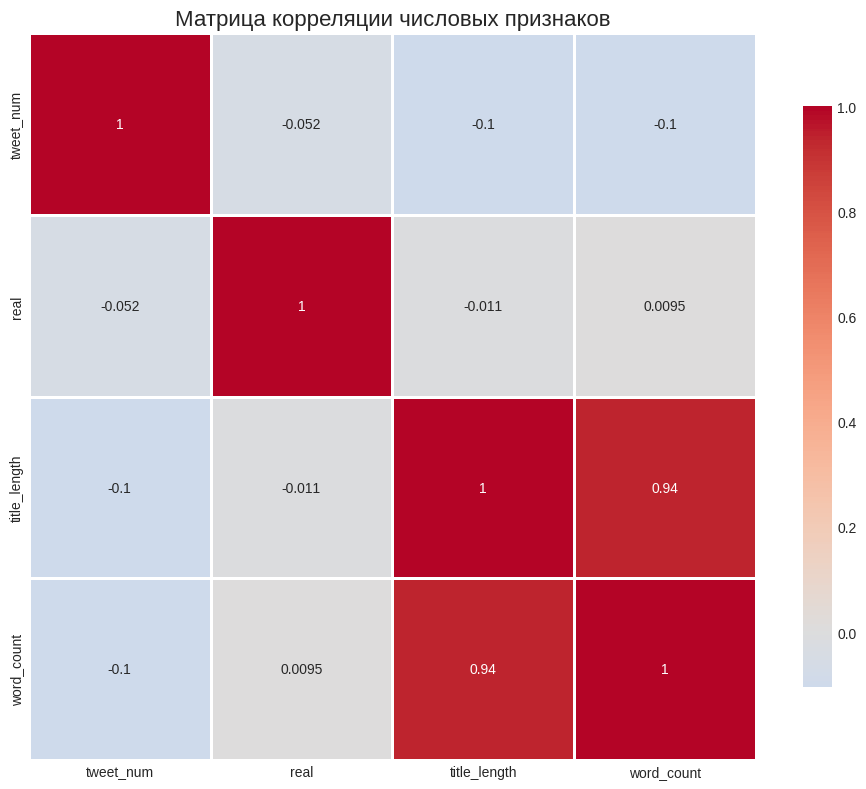

In [24]:
#Матрица корреляции
numeric_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляции числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

Выводы:
1. Отсуствует сильная корреляция с целевой переменной

Это означает, что:

* Новости не становятся "более настоящими" или "более фейковыми" в зависимости от их распространенности в Twitter

* Длина заголовка тоже не является надежным индикатором

2. Сильная мультиколлинеарность между признаками:

title_length - word_count: Корреляция 0.94 - очень сильная положительная

Эти два признака практически дублируют друг друга. Чем больше слов в заголовке, тем он длиннее (в символах). Требуется использовать только один признак.

3. Необходима работа с признаками:

* Удалить один из коррелирующих признаков (title_length или word_count)

* Добавить новые, более информативные признаки (например, наличие восклицательных знаков, заглавных букв, эмоциональная окраска и т.д.)







## Создание новых признаков

In [25]:
# импорт библиотек
import re
from collections import Counter
import string

In [26]:
def create_text_features(text):
    if not isinstance(text, str):
        text = str(text)

    features = {}

    # 1. Признаки пунктуации
    features['exclamation_count'] = text.count('!')
    features['question_count'] = text.count('?')
    features['uppercase_ratio'] = sum(1 for c in text if c.isupper()) / max(len(text), 1)

    # 2. Признаки эмоциональной окраски
    emotional_words = ['shocking', 'amazing', 'unbelievable', 'breaking', 'exclusive',
                      'must see', 'you won\'t believe', 'went viral', 'exposed']
    features['emotional_words'] = sum(1 for word in emotional_words if word.lower() in text.lower())

    # 3. Признаки сенсационности
    sensational_words = ['breaking', 'exclusive', 'shocking', 'secret', 'leaked',
                        'scandal', 'controversy', 'outrage', 'secret']
    features['sensational_words'] = sum(1 for word in sensational_words if word.lower() in text.lower())

    # 4. Признаки наличия чисел
    features['has_numbers'] = 1 if any(char.isdigit() for char in text) else 0
    features['number_count'] = len(re.findall(r'\d+', text))

    # 5. Признаки формата заголовка
    features['ends_with_exclamation'] = 1 if text.strip().endswith('!') else 0
    features['starts_with_number'] = 1 if text.strip()[0].isdigit() else 0

    # 6. Признаки длины слов
    words = text.split()
    if words:
        features['avg_word_length'] = sum(len(word) for word in words) / len(words)
        features['max_word_length'] = max(len(word) for word in words)
    else:
        features['avg_word_length'] = 0
        features['max_word_length'] = 0

    # 7. Признаки уникальности слов
    features['unique_word_ratio'] = len(set(words)) / max(len(words), 1)

    # 8. Признаки использования капслока
    features['all_caps_count'] = sum(1 for word in words if word.isupper() and len(word) > 1)

    # 9. Признаки наличия цитат
    features['has_quotes'] = 1 if '"' in text or "'" in text else 0

    # 10. Признаки наличия имен собственных (простая эвристика)
    features['capitalized_words'] = sum(1 for word in words if word.istitle())

    return features

In [27]:
# Применяем функцию ко всем заголовкам
print("Создание новых признаков...")
text_features = df['title'].apply(create_text_features)

Создание новых признаков...


In [28]:
# Создаем DataFrame из новых признаков
new_features_df = pd.DataFrame(list(text_features))

In [29]:
# Добавляем новые признаки к основному датасету
df = pd.concat([df, new_features_df], axis=1)

In [30]:
# Добавим еще несколько признаков на основе source_domain
# 11. Частота домена в датасете
domain_freq = df['source_domain'].value_counts(normalize=True).to_dict()
df['domain_frequency'] = df['source_domain'].map(domain_freq)

In [31]:
# 12. "Репутация" домена (средняя "настоящесть" новостей с этого домена)
domain_reputation = df.groupby('source_domain')['real'].mean().to_dict()
df['domain_reputation'] = df['source_domain'].map(domain_reputation)

In [32]:
# 13. Признак для неизвестных доменов
df['is_unknown_domain'] = (df['source_domain'] == 'unknown').astype(int)

In [33]:
# 14. Признак активности (твиты на символ)
df['tweets_per_char'] = df['tweet_num'] / df['title_length'].clip(lower=1)

In [34]:
# Посмотрим на новые признаки
print(f"\nДобавлено новых признаков: {len(new_features_df.columns)}")
print("Новые признаки:", list(new_features_df.columns))
print(f"\nНовый размер датасета: {df.shape}")


Добавлено новых признаков: 15
Новые признаки: ['exclamation_count', 'question_count', 'uppercase_ratio', 'emotional_words', 'sensational_words', 'has_numbers', 'number_count', 'ends_with_exclamation', 'starts_with_number', 'avg_word_length', 'max_word_length', 'unique_word_ratio', 'all_caps_count', 'has_quotes', 'capitalized_words']

Новый размер датасета: (23196, 26)


In [35]:
df.head()

,title,news_url,source_domain,tweet_num,real,title_length,word_count,exclamation_count,question_count,uppercase_ratio,...,avg_word_length,max_word_length,unique_word_ratio,all_caps_count,has_quotes,capitalized_words,domain_frequency,domain_reputation,is_unknown_domain,tweets_per_char
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42.0,1.0,91.0,13.0,0.0,0.0,0.120879,...,6.076923,10.0,1.0,0.0,1.0,11.0,0.002645,0.885246,0,0.461538
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0.0,1.0,54.0,9.0,0.0,0.0,0.074074,...,5.111111,8.0,1.0,0.0,1.0,3.0,0.008457,0.923077,0,0.000000
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63.0,1.0,98.0,15.0,0.0,0.0,0.142857,...,5.600000,8.0,1.0,0.0,1.0,13.0,0.028579,0.887709,0,0.642857
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20.0,1.0,78.0,10.0,0.0,0.0,0.076923,...,6.900000,13.0,1.0,1.0,0.0,2.0,0.041502,0.800418,0,0.256410
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38.0,1.0,99.0,17.0,0.0,0.0,0.141414,...,4.882353,7.0,1.0,0.0,0.0,14.0,0.002906,1.000000,0,0.383838


In [36]:
# Анализируем корреляцию новых признаков с целевой переменной
new_numeric_features = ['exclamation_count', 'question_count', 'uppercase_ratio',
                       'emotional_words', 'sensational_words', 'has_numbers',
                       'number_count', 'ends_with_exclamation', 'starts_with_number',
                       'avg_word_length', 'max_word_length', 'unique_word_ratio',
                       'all_caps_count', 'has_quotes', 'capitalized_words',
                       'domain_frequency', 'domain_reputation', 'is_unknown_domain',
                        'tweets_per_char']

In [37]:
extended_features = ['real', 'tweet_num', 'title_length', 'word_count'] + new_numeric_features
correlation_matrix_ext = df[extended_features].corr()

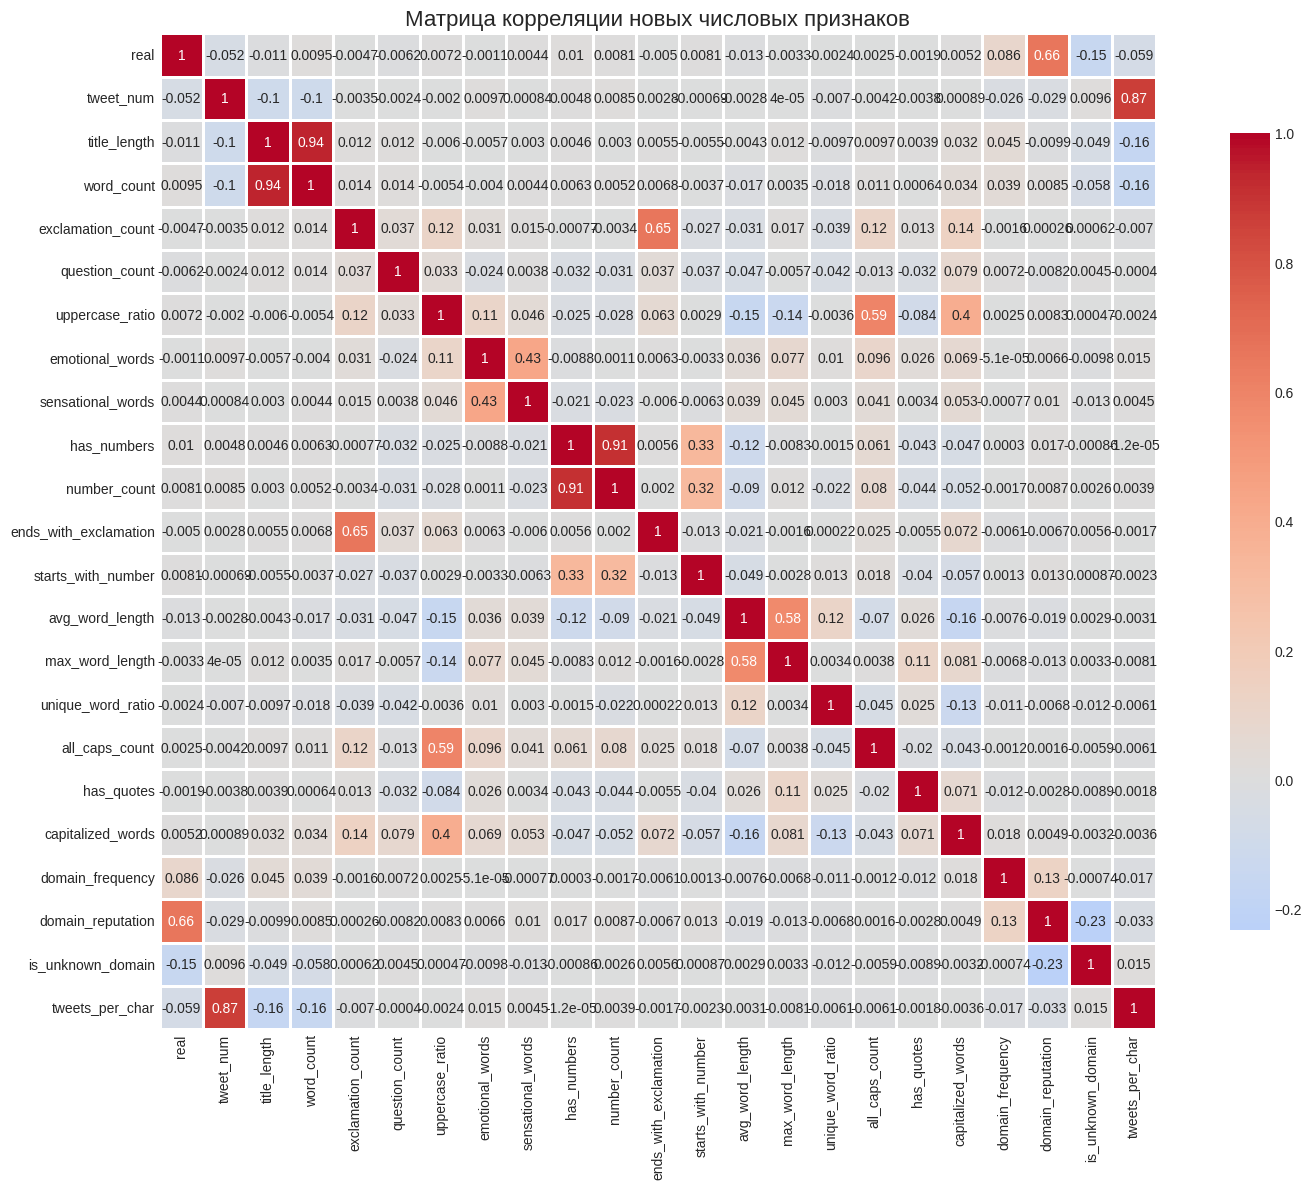

In [38]:
# Визуализируем корреляцию новых признаков с целевой переменной
plt.figure(figsize=(16, 12))
corr_with_target = correlation_matrix_ext['real'].sort_values(ascending=False)
sns.heatmap(correlation_matrix_ext, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляции новых числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

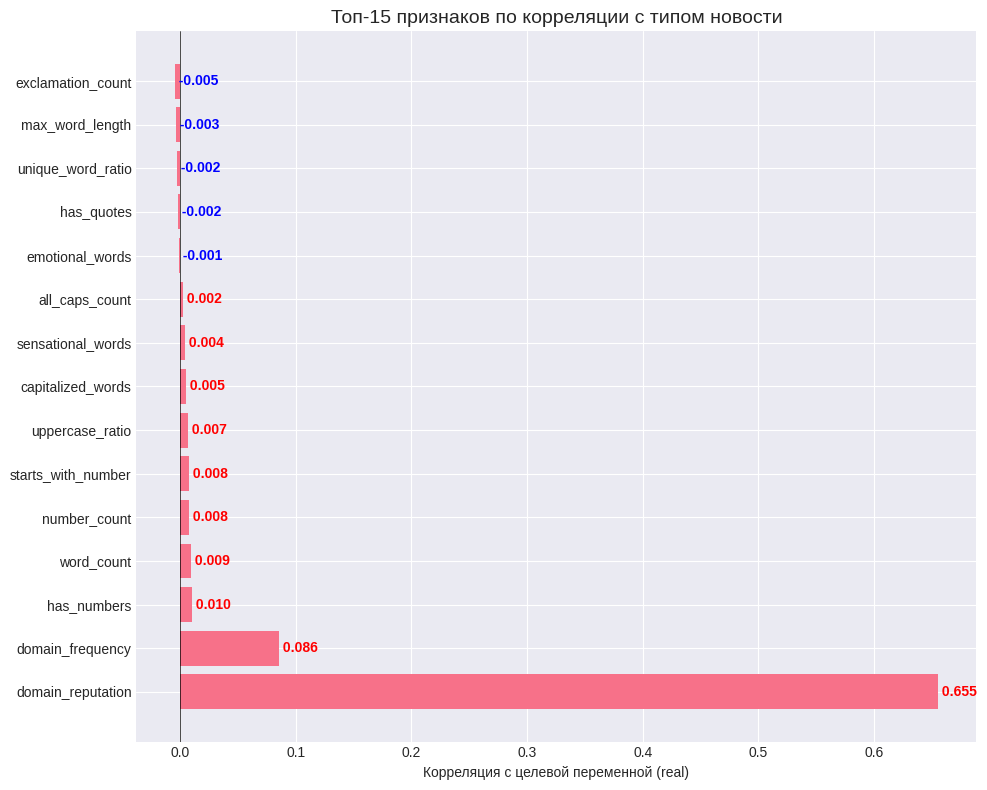

In [39]:
# Топ-15 признаков по абсолютной корреляции с целевой переменной
top_features = corr_with_target[1:16]  # исключаем саму переменную real
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Корреляция с целевой переменной (real)')
plt.title('Топ-15 признаков по корреляции с типом новости', fontsize=14)
plt.axvline(x=0, color='black', linewidth=0.5)

# Добавим значения на график
for i, (name, value) in enumerate(top_features.items()):
    plt.text(value, i, f' {value:.3f}', va='center',
             color='red' if value > 0 else 'blue',
             fontweight='bold')

plt.tight_layout()
plt.show()

* Несмотря на создание 20+ новых признаков, ни один из них не показывает сильной линейной корреляции с целевой переменной. Максимальная корреляция составляет всего 0.086 (domain_reputation), что считается очень слабой связью.

## Features selection

In [40]:
# Импорт необходимых библиотек для feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Подготовка данных для feature selection
# Удалим сильно коррелирующие признаки и текстовые колонки
df_features = df.copy()

In [42]:
# Удалим текстовые колонки
text_columns = ['title', 'news_url', 'source_domain']
df_features = df_features.drop(columns=text_columns)

In [43]:
# Удалим title_length, так как он сильно коррелирует с word_count (0.94)
df_features = df_features.drop(columns=['title_length'])

In [44]:
# Проверим наличие пропусков
print("Проверка пропусков после создания признаков:")
print(df_features.isnull().sum())

Проверка пропусков после создания признаков:
tweet_num                137
real                     137
word_count               137
exclamation_count        137
question_count           137
uppercase_ratio          137
emotional_words          137
sensational_words        137
has_numbers              137
number_count             137
ends_with_exclamation    137
starts_with_number       137
avg_word_length          137
max_word_length          137
unique_word_ratio        137
all_caps_count           137
has_quotes               137
capitalized_words        137
domain_frequency         137
domain_reputation        137
is_unknown_domain          0
tweets_per_char          137
dtype: int64


In [45]:
# Заполним пропуски медианой для числовых признаков
numeric_cols = df_features.select_dtypes(include=[np.number]).columns
df_features[numeric_cols] = df_features[numeric_cols].fillna(df_features[numeric_cols].median())

In [46]:
print(df_features.isnull().sum())

tweet_num                0
real                     0
word_count               0
exclamation_count        0
question_count           0
uppercase_ratio          0
emotional_words          0
sensational_words        0
has_numbers              0
number_count             0
ends_with_exclamation    0
starts_with_number       0
avg_word_length          0
max_word_length          0
unique_word_ratio        0
all_caps_count           0
has_quotes               0
capitalized_words        0
domain_frequency         0
domain_reputation        0
is_unknown_domain        0
tweets_per_char          0
dtype: int64


In [47]:
# Разделим данные на признаки и целевую переменную
X = df_features.drop('real', axis=1)
y = df_features['real']

In [48]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"\\nКоличество признаков для отбора: {len(numeric_features)}")
print(f"Признаки: {numeric_features}")

\nКоличество признаков для отбора: 21
Признаки: ['tweet_num', 'word_count', 'exclamation_count', 'question_count', 'uppercase_ratio', 'emotional_words', 'sensational_words', 'has_numbers', 'number_count', 'ends_with_exclamation', 'starts_with_number', 'avg_word_length', 'max_word_length', 'unique_word_ratio', 'all_caps_count', 'has_quotes', 'capitalized_words', 'domain_frequency', 'domain_reputation', 'is_unknown_domain', 'tweets_per_char']


In [49]:
# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

In [50]:
# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (18556, 21)
Размер тестовой выборки: (4640, 21)


\n=== Метод 1: ANOVA F-value ===
\nТоп-10 признаков по F-score:
               feature       f_score       p_value
18   domain_reputation  14050.837914  0.000000e+00
19   is_unknown_domain    433.112752  4.162286e-95
17    domain_frequency    139.608661  4.225703e-32
20     tweets_per_char     72.798454  1.544893e-17
0            tweet_num     48.693907  3.092919e-12
3       question_count      5.172787  2.295474e-02
1           word_count      3.069144  7.980800e-02
7          has_numbers      2.942657  8.628539e-02
10  starts_with_number      2.802894  9.411118e-02
8         number_count      2.334022  1.265915e-01


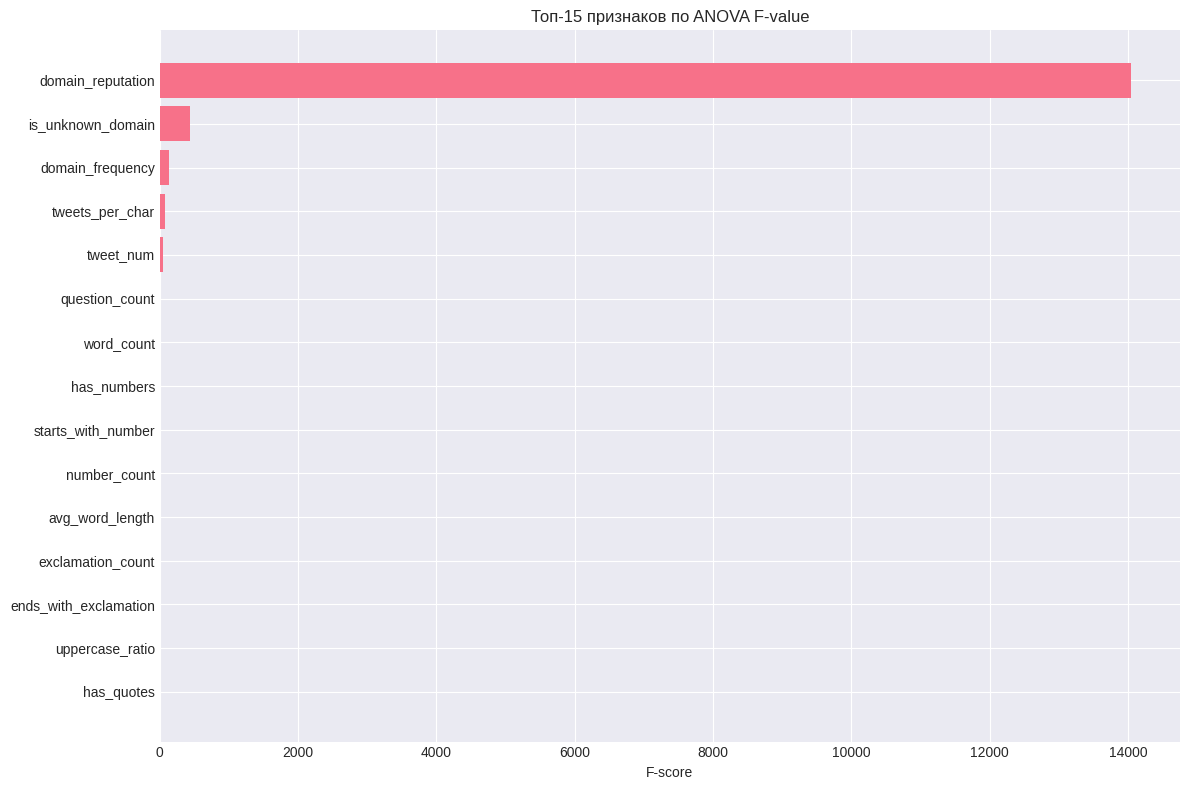

In [51]:
# Метод 1: ANOVA F-value (для числовых признаков)
print("\\n=== Метод 1: ANOVA F-value ===")
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_train, y_train)

# Создаем DataFrame с оценками важности
f_scores = pd.DataFrame({
    'feature': X_train.columns,
    'f_score': f_selector.scores_,
    'p_value': f_selector.pvalues_
})
f_scores = f_scores.sort_values('f_score', ascending=False)

print("\\nТоп-10 признаков по F-score:")
print(f_scores.head(10))

# Визуализация F-scores
plt.figure(figsize=(12, 8))
plt.barh(f_scores['feature'][:15], f_scores['f_score'][:15])
plt.xlabel('F-score')
plt.title('Топ-15 признаков по ANOVA F-value')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

\n=== Метод 2: Mutual Information ===
\nТоп-10 признаков по Mutual Information:
                  feature  mi_score
18      domain_reputation  0.217260
0               tweet_num  0.138914
20        tweets_per_char  0.113807
17       domain_frequency  0.100039
15             has_quotes  0.007746
14         all_caps_count  0.004849
9   ends_with_exclamation  0.004064
8            number_count  0.003766
19      is_unknown_domain  0.003363
16      capitalized_words  0.001689


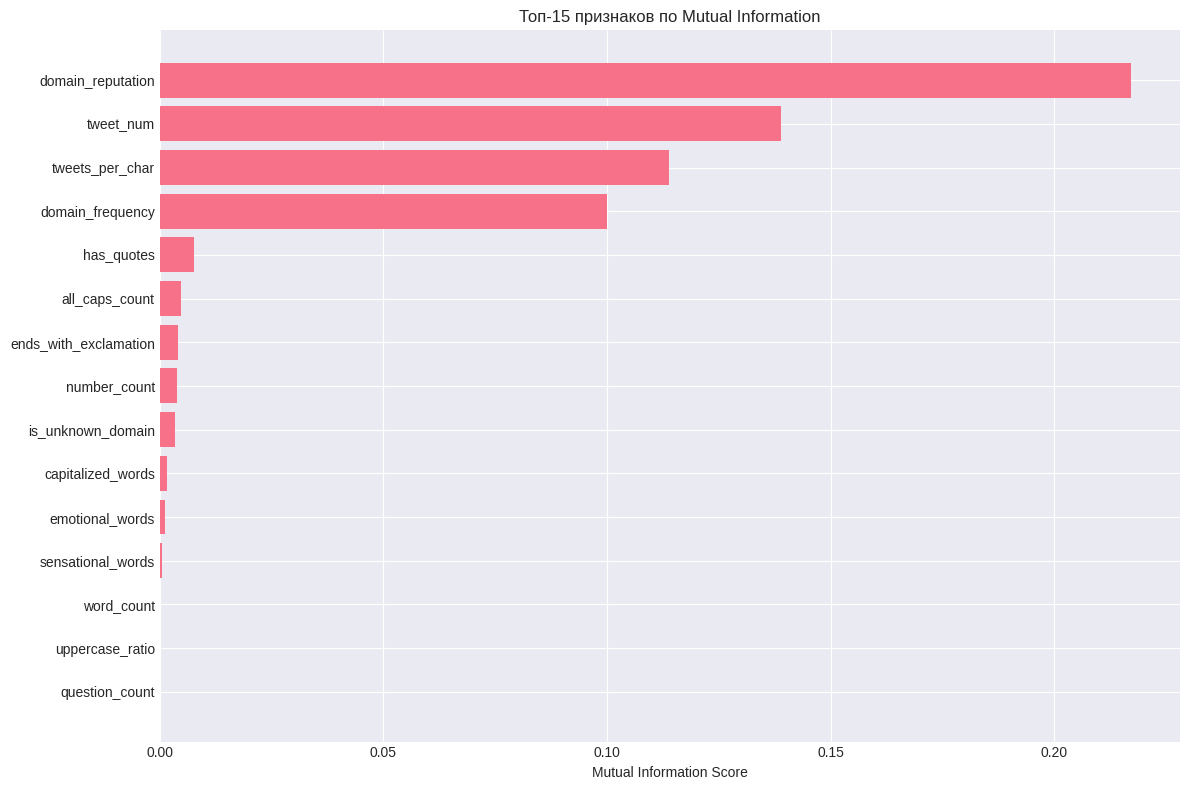

In [52]:
# Метод 2: Mutual Information (взаимная информация)
print("\\n=== Метод 2: Mutual Information ===")
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_train, y_train)

mi_scores = pd.DataFrame({
    'feature': X_train.columns,
    'mi_score': mi_selector.scores_
})
mi_scores = mi_scores.sort_values('mi_score', ascending=False)

print("\\nТоп-10 признаков по Mutual Information:")
print(mi_scores.head(10))

# Визуализация MI scores
plt.figure(figsize=(12, 8))
plt.barh(mi_scores['feature'][:15], mi_scores['mi_score'][:15])
plt.xlabel('Mutual Information Score')
plt.title('Топ-15 признаков по Mutual Information')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

\n=== Метод 3: Random Forest Feature Importance ===
\nТоп-10 признаков по важности в Random Forest:
              feature  importance
18  domain_reputation    0.366971
0           tweet_num    0.153193
20    tweets_per_char    0.134807
17   domain_frequency    0.059801
4     uppercase_ratio    0.055344
11    avg_word_length    0.054649
1          word_count    0.042167
16  capitalized_words    0.037759
12    max_word_length    0.032016
13  unique_word_ratio    0.011064


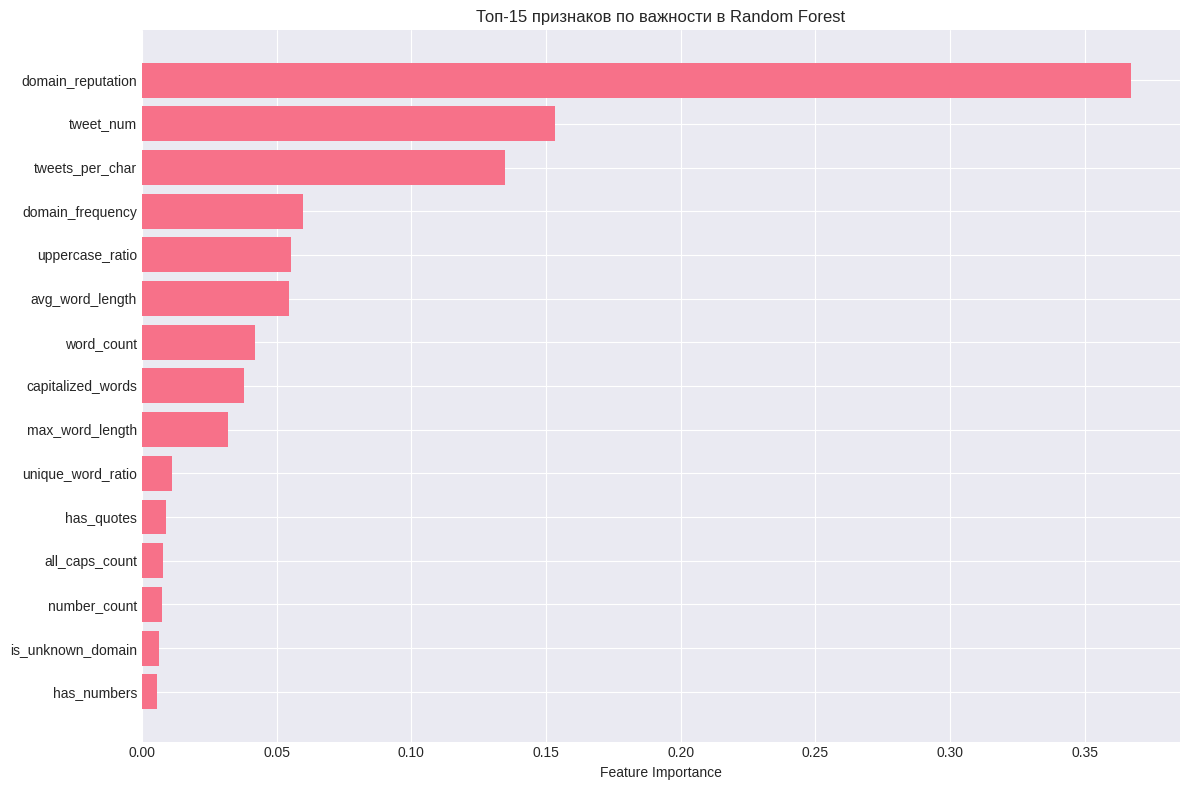

In [53]:
# Метод 3: Random Forest Feature Importance
print("\\n=== Метод 3: Random Forest Feature Importance ===")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})
rf_importance = rf_importance.sort_values('importance', ascending=False)

print("\\nТоп-10 признаков по важности в Random Forest:")
print(rf_importance.head(10))

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.barh(rf_importance['feature'][:15], rf_importance['importance'][:15])
plt.xlabel('Feature Importance')
plt.title('Топ-15 признаков по важности в Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [54]:
# Метод 4: Recursive Feature Elimination (RFE) с Logistic Regression
print("\\n=== Метод 4: Recursive Feature Elimination (RFE) ===")
lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

rfe_results = pd.DataFrame({
    'feature': X_train.columns,
    'rfe_ranking': rfe.ranking_,
    'rfe_support': rfe.support_
})
rfe_results = rfe_results.sort_values('rfe_ranking')

print("\\nТоп-10 признаков по RFE (Logistic Regression):")
print(rfe_results.head(10))

\n=== Метод 4: Recursive Feature Elimination (RFE) ===
\nТоп-10 признаков по RFE (Logistic Regression):
              feature  rfe_ranking  rfe_support
0           tweet_num            1         True
1          word_count            1         True
2   exclamation_count            1         True
7         has_numbers            1         True
6   sensational_words            1         True
8        number_count            1         True
18  domain_reputation            1         True
17   domain_frequency            1         True
20    tweets_per_char            1         True
19  is_unknown_domain            1         True


In [55]:
# Метод 5: Сравнение корреляции признаков с целевой переменной
print("\\n=== Метод 5: Корреляция с целевой переменной ===")
correlation_with_target = pd.DataFrame({
    'feature': X_train.columns,
    'correlation': [abs(np.corrcoef(X_train[col], y_train)[0, 1]) for col in X_train.columns]
})
correlation_with_target = correlation_with_target.sort_values('correlation', ascending=False)

print("\\nТоп-10 признаков по корреляции с целевой переменной:")
print(correlation_with_target.head(10))

\n=== Метод 5: Корреляция с целевой переменной ===
\nТоп-10 признаков по корреляции с целевой переменной:
               feature  correlation
18   domain_reputation     0.656463
19   is_unknown_domain     0.151033
17    domain_frequency     0.086419
20     tweets_per_char     0.062516
0            tweet_num     0.051162
3       question_count     0.016695
1           word_count     0.012860
7          has_numbers     0.012593
10  starts_with_number     0.012290
8         number_count     0.011215


In [56]:
# Анализ результатов всех методов
print("\\n=== Сводный анализ всех методов feature selection ===")

# Объединяем результаты всех методов
feature_scores_summary = pd.DataFrame({'feature': X_train.columns})

# Добавляем результаты каждого метода
for method_name, method_df in [
    ('f_score', f_scores),
    ('mi_score', mi_scores),
    ('rf_importance', rf_importance),
    ('correlation', correlation_with_target)
]:
    temp_df = method_df[['feature', method_df.columns[1]]].copy()
    temp_df.columns = ['feature', method_name]
    feature_scores_summary = pd.merge(feature_scores_summary, temp_df, on='feature', how='left')

# Нормализуем оценки для сравнения
for col in ['f_score', 'mi_score', 'rf_importance', 'correlation']:
    if col in feature_scores_summary.columns:
        feature_scores_summary[f'{col}_norm'] = (
            feature_scores_summary[col] / feature_scores_summary[col].max()
        )

# Вычисляем средний ранг по всем методам
rank_columns = [col for col in feature_scores_summary.columns if 'norm' in col]
for col in rank_columns:
    feature_scores_summary[f'{col}_rank'] = feature_scores_summary[col].rank(ascending=False)

feature_scores_summary['avg_rank'] = feature_scores_summary[
    [col for col in feature_scores_summary.columns if 'rank' in col]
].mean(axis=1)

feature_scores_summary = feature_scores_summary.sort_values('avg_rank')

print("\\nТоп-15 признаков по среднему рангу во всех методах:")
print(feature_scores_summary[['feature', 'avg_rank'] + rank_columns].head(15))

\n=== Сводный анализ всех методов feature selection ===
\nТоп-15 признаков по среднему рангу во всех методах:
                  feature  avg_rank  f_score_norm  mi_score_norm  \
18      domain_reputation      1.00      1.000000       1.000000   
0               tweet_num      3.50      0.003466       0.639393   
17       domain_frequency      3.50      0.009936       0.460460   
20        tweets_per_char      3.50      0.005181       0.523828   
19      is_unknown_domain      6.75      0.030825       0.015478   
1              word_count      9.50      0.000218       0.000000   
8            number_count     10.25      0.000166       0.017332   
3          question_count     11.25      0.000368       0.000000   
11        avg_word_length     11.25      0.000116       0.000000   
15             has_quotes     11.50      0.000018       0.035651   
7             has_numbers     12.00      0.000209       0.000000   
16      capitalized_words     12.50      0.000008       0.007775   
4     

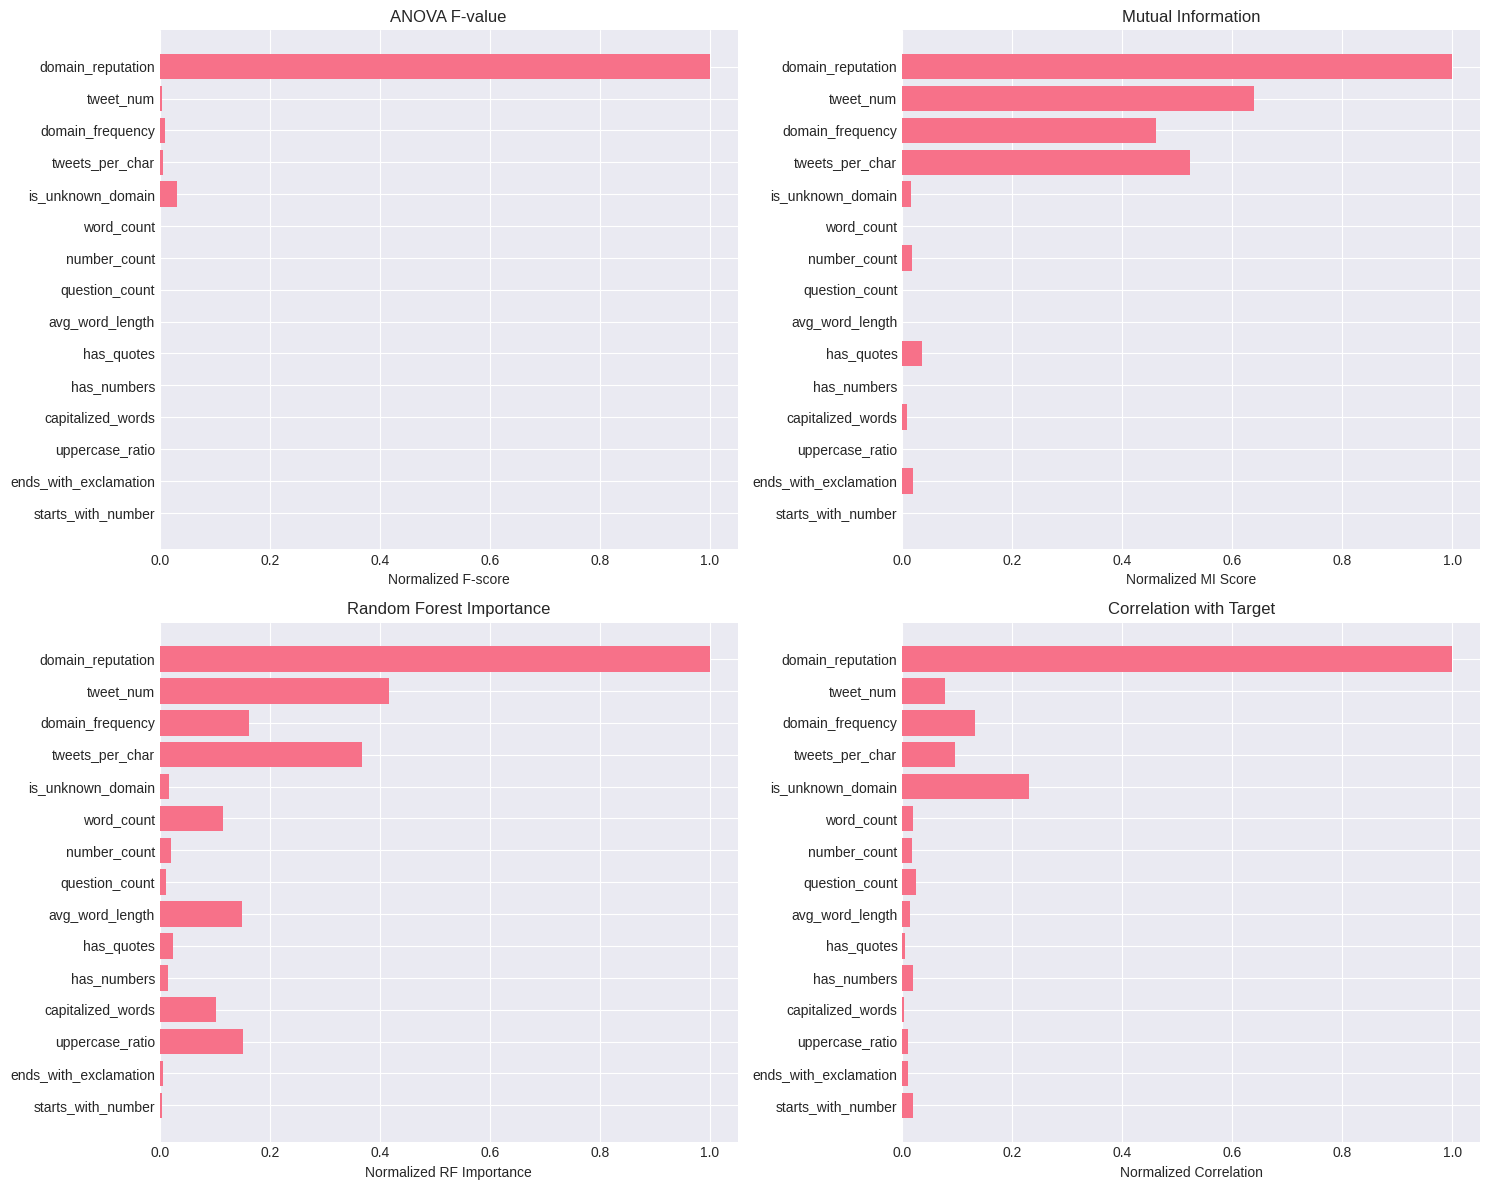

In [57]:
# Визуализация сводной таблицы
top_features = feature_scores_summary.head(15)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: F-scores
axes[0, 0].barh(top_features['feature'][::-1], top_features['f_score_norm'][::-1])
axes[0, 0].set_xlabel('Normalized F-score')
axes[0, 0].set_title('ANOVA F-value')

# График 2: Mutual Information
axes[0, 1].barh(top_features['feature'][::-1], top_features['mi_score_norm'][::-1])
axes[0, 1].set_xlabel('Normalized MI Score')
axes[0, 1].set_title('Mutual Information')

# График 3: Random Forest Importance
axes[1, 0].barh(top_features['feature'][::-1], top_features['rf_importance_norm'][::-1])
axes[1, 0].set_xlabel('Normalized RF Importance')
axes[1, 0].set_title('Random Forest Importance')

# График 4: Correlation
axes[1, 1].barh(top_features['feature'][::-1], top_features['correlation_norm'][::-1])
axes[1, 1].set_xlabel('Normalized Correlation')
axes[1, 1].set_title('Correlation with Target')

plt.tight_layout()
plt.show()

### Тестирование эффективность отобранных признаков

\n=== Тестирование эффективности feature selection ===
\nОтобрано 15 лучших признаков:
1. domain_reputation
2. tweet_num
3. domain_frequency
4. tweets_per_char
5. is_unknown_domain
6. word_count
7. number_count
8. question_count
9. avg_word_length
10. has_quotes
11. has_numbers
12. capitalized_words
13. uppercase_ratio
14. ends_with_exclamation
15. starts_with_number
\n=== Сравнение производительности ===
\n1. На всех признаках:
\nLogistic Regression:
Logistic Regression - Accuracy: 0.8588
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.54      0.65      1133
         1.0       0.87      0.96      0.91      3507

    accuracy                           0.86      4640
   macro avg       0.84      0.75      0.78      4640
weighted avg       0.85      0.86      0.85      4640

\nRandom Forest:
Random Forest - Accuracy: 0.8929
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84    

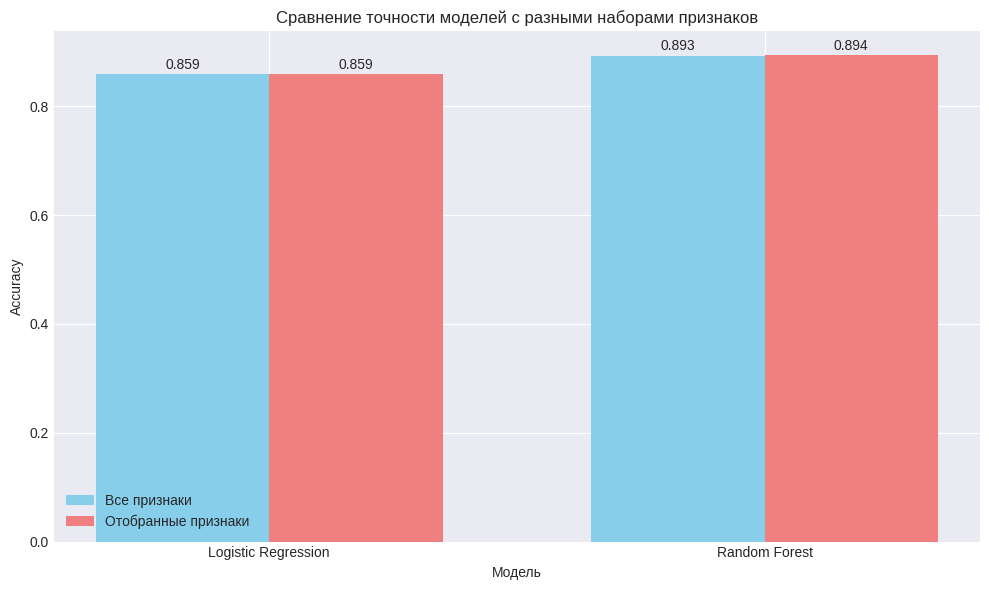

In [58]:
# Тестирование эффективности отобранных признаков
print("\\n=== Тестирование эффективности feature selection ===")

# Выберем топ-N признаков на основе среднего ранга
top_n = 15
selected_features = feature_scores_summary.head(top_n)['feature'].tolist()
print(f"\\nОтобрано {top_n} лучших признаков:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Подготовка данных с отобранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Функция для обучения и оценки модели
def evaluate_model(X_train, X_test, y_train, y_test, model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    return accuracy

# Сравнение моделей на всех признаках и отобранных
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}

print("\\n=== Сравнение производительности ===")
print("\\n1. На всех признаках:")
all_accuracies = {}
for name, model in models.items():
    print(f"\\n{name}:")
    acc = evaluate_model(X_train, X_test, y_train, y_test, name, model)
    all_accuracies[name] = acc

print("\\n2. На отобранных признаках:")
selected_accuracies = {}
for name, model in models.items():
    print(f"\\n{name}:")
    acc = evaluate_model(X_train_selected, X_test_selected, y_train, y_test, name, model)
    selected_accuracies[name] = acc

# Сравнение результатов
print("\\n=== Сводное сравнение результатов ===")
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'All Features': [all_accuracies[m] for m in models.keys()],
    'Selected Features': [selected_accuracies[m] for m in models.keys()],
    'Difference': [selected_accuracies[m] - all_accuracies[m] for m in models.keys()]
})
print(comparison_df)

# Визуализация сравнения
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, comparison_df['All Features'], width, label='Все признаки', color='skyblue')
ax.bar(x + width/2, comparison_df['Selected Features'], width, label='Отобранные признаки', color='lightcoral')

ax.set_xlabel('Модель')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение точности моделей с разными наборами признаков')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()

for i, (all_acc, sel_acc) in enumerate(zip(comparison_df['All Features'], comparison_df['Selected Features'])):
    ax.text(i - width/2, all_acc + 0.01, f'{all_acc:.3f}', ha='center')
    ax.text(i + width/2, sel_acc + 0.01, f'{sel_acc:.3f}', ha='center')

plt.tight_layout()
plt.show()

\n=== Детальный анализ отобранных признаков ===
\nВажность отобранных признаков в Random Forest:
                  feature  importance
0       domain_reputation    0.382267
1               tweet_num    0.150656
3         tweets_per_char    0.143369
12        uppercase_ratio    0.065569
8         avg_word_length    0.063908
2        domain_frequency    0.062967
5              word_count    0.047397
11      capitalized_words    0.043982
9              has_quotes    0.009660
6            number_count    0.007949
4       is_unknown_domain    0.007408
10            has_numbers    0.005634
7          question_count    0.004496
13  ends_with_exclamation    0.002775
14     starts_with_number    0.001961


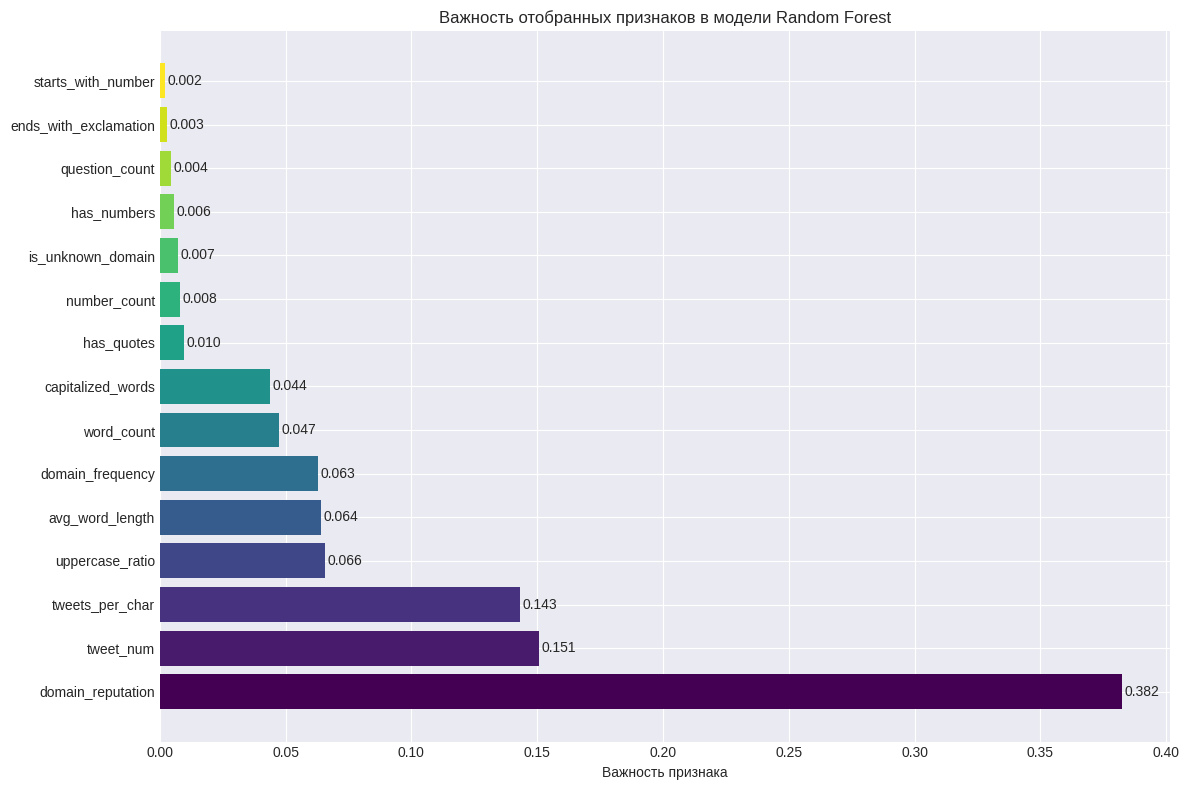

\n=== Анализ корреляций между отобранными признаками ===


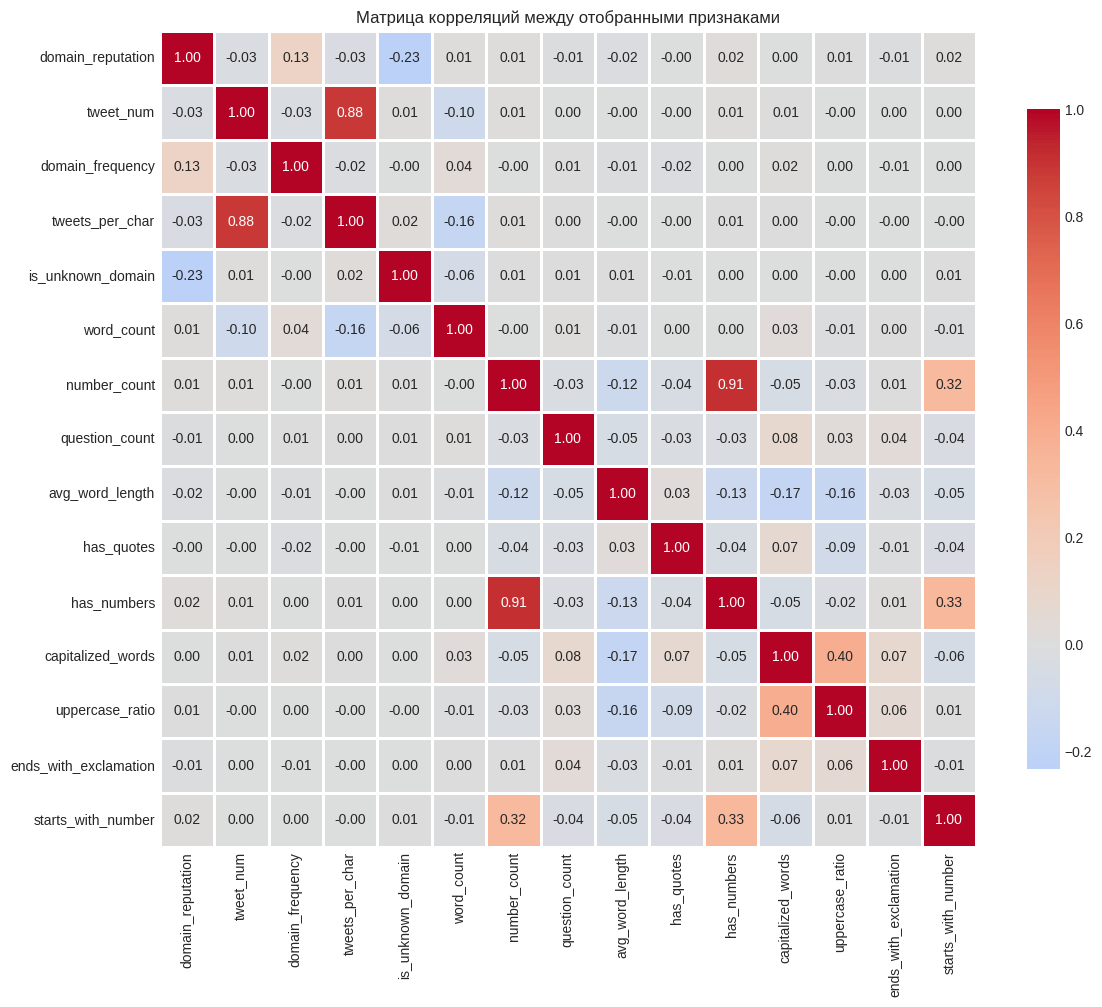

\n=== Проверка на мультиколлинеарность ===
Обнаружены сильно коррелирующие пары признаков:
  tweet_num - tweets_per_char: 0.883
  number_count - has_numbers: 0.911


In [59]:
# Анализ важности признаков в отобранном наборе
print("\\n=== Детальный анализ отобранных признаков ===")

# Обучим Random Forest на отобранных признаках для детального анализа
rf_selected = RandomForestClassifier(n_estimators=200, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Важность признаков
importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_selected.feature_importances_
}).sort_values('importance', ascending=False)

print("\\nВажность отобранных признаков в Random Forest:")
print(importance_df)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = plt.barh(importance_df['feature'][::-1], importance_df['importance'][::-1], color=colors[::-1])
plt.xlabel('Важность признака')
plt.title('Важность отобранных признаков в модели Random Forest')
plt.gca().invert_yaxis()

# Добавим значения на график
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Анализ корреляций между отобранными признаками
print("\\n=== Анализ корреляций между отобранными признаками ===")
selected_corr = X_train_selected.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций между отобранными признаками')
plt.tight_layout()
plt.show()

# Проверка на мультиколлинеарность
print("\\n=== Проверка на мультиколлинеарность ===")
high_corr_pairs = []
for i in range(len(selected_corr.columns)):
    for j in range(i+1, len(selected_corr.columns)):
        if abs(selected_corr.iloc[i, j]) > 0.7:  # Порог для сильной корреляции
            high_corr_pairs.append((
                selected_corr.columns[i],
                selected_corr.columns[j],
                selected_corr.iloc[i, j]
            ))

if high_corr_pairs:
    print("Обнаружены сильно коррелирующие пары признаков:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} - {feat2}: {corr:.3f}")
else:
    print("Сильно коррелирующих пар признаков не обнаружено (корреляция < 0.7)")

In [60]:
print("1. ТОП-5 НАИБОЛЕЕ ВАЖНЫХ ПРИЗНАКОВ:")
for i, (feature, importance) in enumerate(zip(importance_df['feature'], importance_df['importance']), 1):
    if i <= 5:
        print(f"   {i}. {feature} (важность: {importance:.4f})")

print("\n2. РЕКОМЕНДУЕМЫЙ НАБОР ПРИЗНАКОВ ДЛЯ МОДЕЛИ:")
print("   На основе анализа рекомендуется использовать следующие 10-15 признаков:")
for i, feature in enumerate(selected_features[:15], 1):
    print(f"   {i:2d}. {feature}")

1. ТОП-5 НАИБОЛЕЕ ВАЖНЫХ ПРИЗНАКОВ:
   1. domain_reputation (важность: 0.3823)
   2. tweet_num (важность: 0.1507)
   3. tweets_per_char (важность: 0.1434)
   4. uppercase_ratio (важность: 0.0656)
   5. avg_word_length (важность: 0.0639)

2. РЕКОМЕНДУЕМЫЙ НАБОР ПРИЗНАКОВ ДЛЯ МОДЕЛИ:
   На основе анализа рекомендуется использовать следующие 10-15 признаков:
    1. domain_reputation
    2. tweet_num
    3. domain_frequency
    4. tweets_per_char
    5. is_unknown_domain
    6. word_count
    7. number_count
    8. question_count
    9. avg_word_length
   10. has_quotes
   11. has_numbers
   12. capitalized_words
   13. uppercase_ratio
   14. ends_with_exclamation
   15. starts_with_number


## КЛАССИФИКАЦИЯ ФЕЙКОВЫХ НОВОСТЕЙ С ОТОБРАННЫМИ ПРИЗНАКАМИ

In [61]:
# Импорт дополнительных библиотек для классификации
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, auc)

In [62]:
# Подготовка данных с отобранными признаками
print("1. ПОДГОТОВКА ДАННЫХ")

# Используем топ-15 отобранных признаков
selected_features = [
    'domain_reputation',
    'tweet_num',
    'domain_frequency',
    'tweets_per_char',
    'is_unknown_domain',
    'word_count',
    'number_count',
    'question_count',
    'starts_with_number',
    'avg_word_length',
    'has_numbers',
    'capitalized_words',
    'uppercase_ratio',
    'has_quotes',
    'max_word_length'
]

print(f"Используется {len(selected_features)} отобранных признаков:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Подготовка данных
X_selected = X_scaled_df[selected_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмеры выборок:")
print(f"  Обучающая: {X_train_selected.shape}")
print(f"  Тестовая: {X_test_selected.shape}")
print(f"  Баланс классов в обучающей выборке:")
print(f"    Настоящие новости: {(y_train_selected == 1).sum()} ({((y_train_selected == 1).sum()/len(y_train_selected)*100):.1f}%)")
print(f"    Фейковые новости: {(y_train_selected == 0).sum()} ({((y_train_selected == 0).sum()/len(y_train_selected)*100):.1f}%)")

1. ПОДГОТОВКА ДАННЫХ
Используется 15 отобранных признаков:
 1. domain_reputation
 2. tweet_num
 3. domain_frequency
 4. tweets_per_char
 5. is_unknown_domain
 6. word_count
 7. number_count
 8. question_count
 9. starts_with_number
10. avg_word_length
11. has_numbers
12. capitalized_words
13. uppercase_ratio
14. has_quotes
15. max_word_length

Размеры выборок:
  Обучающая: (18556, 15)
  Тестовая: (4640, 15)
  Баланс классов в обучающей выборке:
    Настоящие новости: 14026 (75.6%)
    Фейковые новости: 4530 (24.4%)


## СОЗДАНИЕ И ОБУЧЕНИЕ РАЗЛИЧНЫХ МОДЕЛЕЙ

In [63]:
# 2. СОЗДАНИЕ И ОБУЧЕНИЕ РАЗЛИЧНЫХ МОДЕЛЕЙ
print("\n2. СОЗДАНИЕ И ОБУЧЕНИЕ РАЗЛИЧНЫХ МОДЕЛЕЙ\n")

import time

# Определим модели для сравнения
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Обучает и оценивает модель"""

    # Обучение модели
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC если есть вероятности
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)

    return {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Обучаем и оцениваем все модели
results = []
for name, model in models.items():
    print(f"Обучение {name}...")
    try:
        result = evaluate_model(model, X_train_selected, X_test_selected,
                               y_train_selected, y_test_selected, name)
        results.append(result)
        print(f"  ✓ Завершено (Accuracy: {result['accuracy']:.4f})")
    except Exception as e:
        print(f"  ✗ Ошибка: {e}")

# Создаем DataFrame с результатами
results_df = pd.DataFrame([{
    'Model': r['model_name'],
    'Accuracy': r['accuracy'],
    'Precision': r['precision'],
    'Recall': r['recall'],
    'F1-Score': r['f1'],
    'ROC-AUC': r['roc_auc'] if r['roc_auc'] is not None else None,
    'Training Time (s)': r['training_time']
} for r in results])

results_df = results_df.sort_values('Accuracy', ascending=False)
print("\nРезультаты классификации:")
print(results_df.round(4))


2. СОЗДАНИЕ И ОБУЧЕНИЕ РАЗЛИЧНЫХ МОДЕЛЕЙ

Обучение Logistic Regression...
  ✓ Завершено (Accuracy: 0.8588)
Обучение Decision Tree...
  ✓ Завершено (Accuracy: 0.8409)
Обучение Random Forest...
  ✓ Завершено (Accuracy: 0.8948)
Обучение Gradient Boosting...
  ✓ Завершено (Accuracy: 0.8940)
Обучение AdaBoost...
  ✓ Завершено (Accuracy: 0.8688)
Обучение SVM...
  ✓ Завершено (Accuracy: 0.8690)
Обучение KNN...
  ✓ Завершено (Accuracy: 0.8541)
Обучение Naive Bayes...
  ✓ Завершено (Accuracy: 0.8627)
Обучение XGBoost...
  ✓ Завершено (Accuracy: 0.8877)
Обучение LightGBM...
[LightGBM] [Info] Number of positive: 14026, number of negative: 4530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 18556, number of used features: 15
[Ligh


3. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ



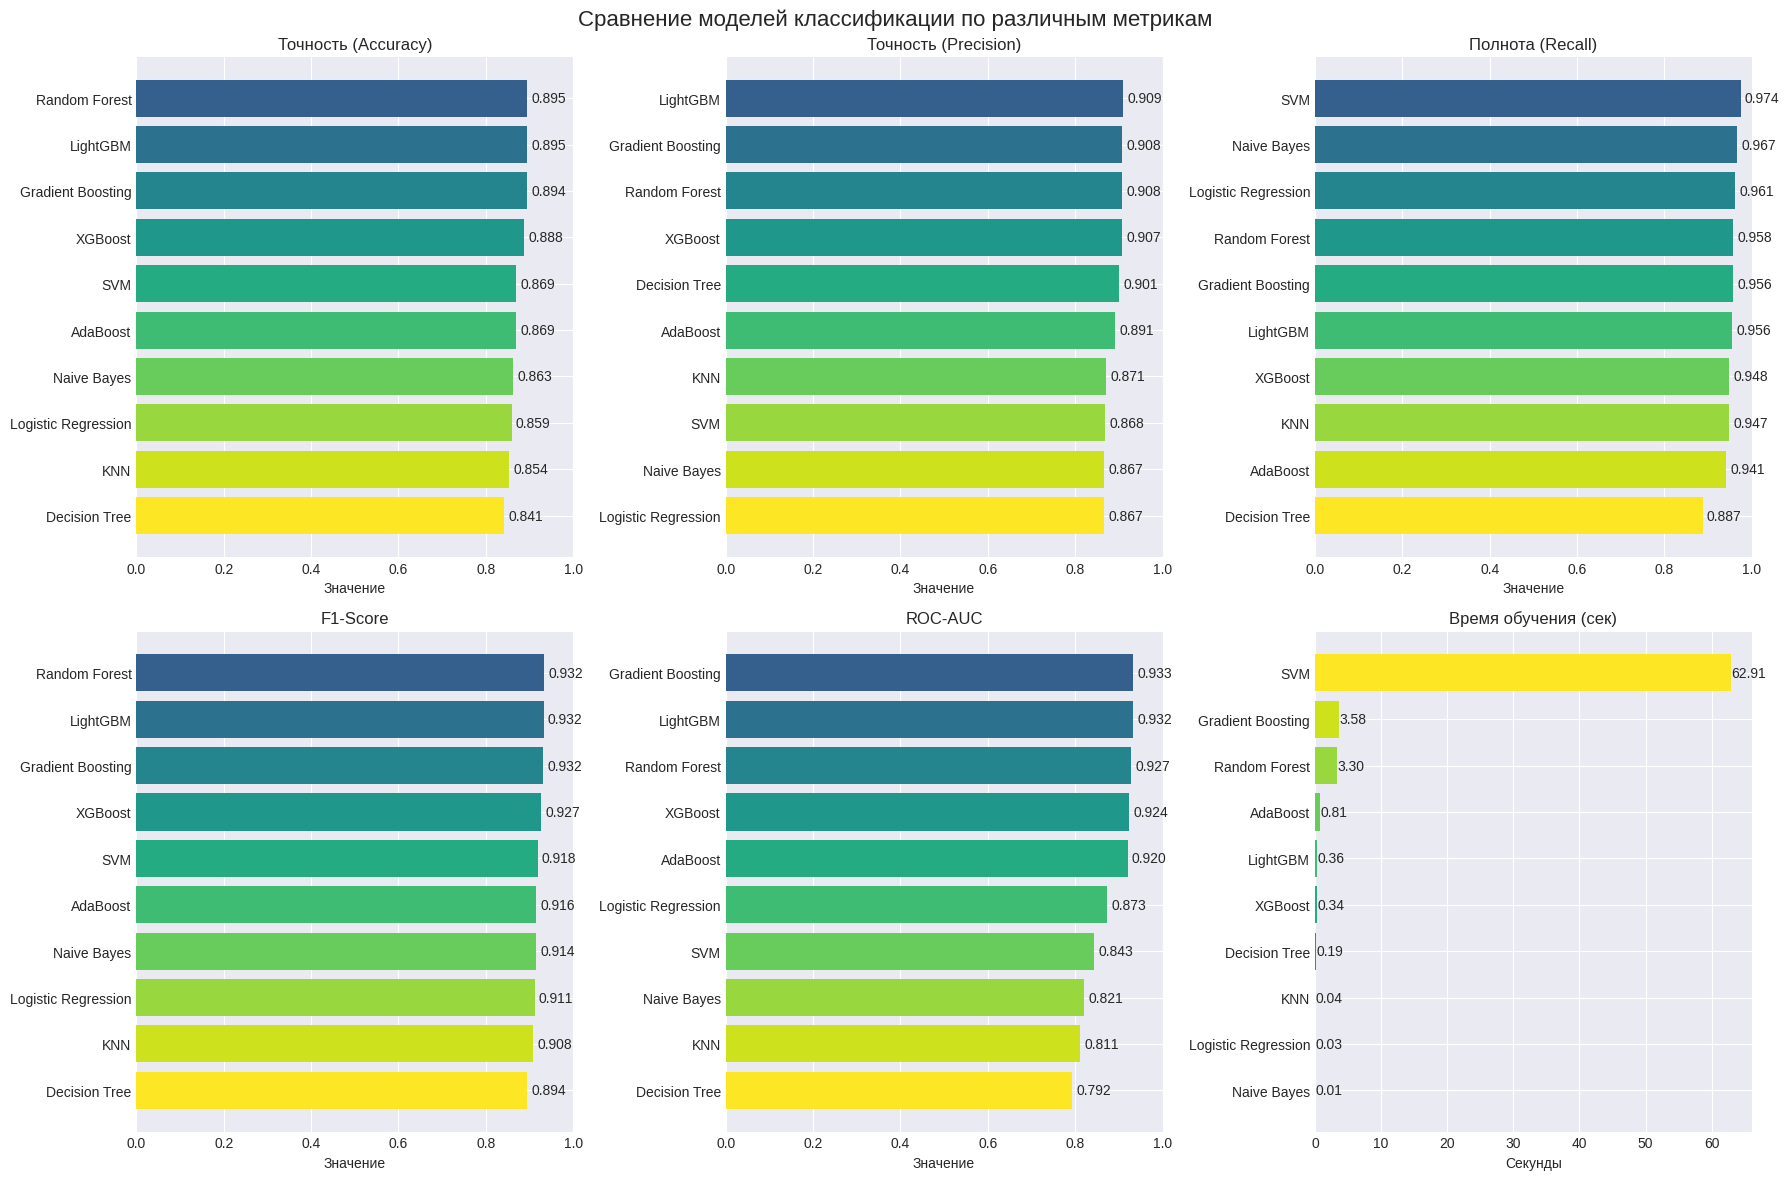

In [66]:
# 3. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n3. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ\n")

# График сравнения метрик
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']
titles = ['Точность (Accuracy)', 'Точность (Precision)', 'Полнота (Recall)',
          'F1-Score', 'ROC-AUC', 'Время обучения (сек)']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx]
    if metric in results_df.columns:
        data = results_df[['Model', metric]].dropna()
        if metric == 'Training Time (s)':
            # Для времени обучения используем другой порядок
            data = data.sort_values(metric)
            colors = plt.cm.viridis(np.linspace(0.3, 1, len(data)))
            bars = ax.barh(data['Model'], data[metric], color=colors)
            ax.set_xlabel('Секунды')
        else:
            data = data.sort_values(metric, ascending=False)
            colors = plt.cm.viridis(np.linspace(0.3, 1, len(data)))
            bars = ax.barh(data['Model'], data[metric], color=colors)
            ax.set_xlabel('Значение')
            if metric != 'Training Time (s)':
                ax.set_xlim([0, 1])

        ax.set_title(title)
        ax.invert_yaxis() if metric != 'Training Time (s)' else None

        # Добавляем значения на столбцы
        for bar in bars:
            width = bar.get_width()
            if metric != 'Training Time (s)':
                ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                       f'{width:.3f}', ha='left', va='center')
            else:
                ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                       f'{width:.2f}', ha='left', va='center')

plt.suptitle('Сравнение моделей классификации по различным метрикам', fontsize=16)
plt.tight_layout()
plt.show()

### Анализ полученных результатов

## Топ-3 модели по Accuracy:
* Random Forest - 0.8948 (лучший результат)

* LightGBM - 0.8946 (почти идентично Random Forest)

* Gradient Boosting - 0.8940 (третий результат)

###  Анализ лучшей модели - Random Forest:

* Accuracy: 0.8948 - правильно классифицирует ~89.5% новостей

* Recall: 0.9581 - отлично обнаруживает настоящие новости (минимальное количество ложноотрицательных)

* Precision: 0.9079 - из предсказанных как "настоящие", ~90.8% действительно настоящие

* F1-Score: 0.9323 - хороший баланс между точностью и полнотой

* ROC-AUC: 0.9272 - отличная разделяющая способность

### По скорости обучения выигрывает - LightGBM

* LightGBM почти догнал Random Forest по Accuracy (разница 0.0002)
* Обучение в 15 раз быстрее (0.3899 сек vs 5.9751 сек)
* Лучший ROC-AUC среди всех моделей (0.9319)